In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/campusx-official/K-Nearest-Neighbors/refs/heads/master/Social_Network_Ads.csv')

In [ ]:
X = data.iloc[:,2:4]
y = data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train

,Age,EstimatedSalary
1,35,20000
307,47,113000
288,41,79000
97,28,123000
138,28,59000
...,...,...
22,48,41000
386,49,39000
8,25,33000
2,26,43000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_test

array([[-1.58880008e+00, -8.36717235e-02],
       [ 1.06862040e-01, -8.25044183e-01],
       [-2.69951765e-01,  1.72957205e-01],
       [-6.46765570e-01,  8.74142287e-02],
       [ 2.08513452e+00, -8.25044183e-01],
       [ 1.80252416e+00, -3.11786326e-01],
       [-1.40039318e+00, -1.22424474e+00],
       [-6.46765570e-01, -1.05315879e+00],
       [-1.11778283e+00,  3.72557482e-01],
       [ 1.06862040e-01,  1.15928554e-01],
       [-1.02357937e+00,  5.15129109e-01],
       [-1.75748314e-01, -1.08167311e+00],
       [-1.21198628e+00,  5.43643435e-01],
       [ 7.66286198e-01,  1.31353022e+00],
       [-1.75748314e-01, -3.11786326e-01],
       [ 2.95268942e-01,  1.87125260e-03],
       [ 8.60489650e-01, -1.30978771e+00],
       [ 1.06862040e-01,  9.99872641e-01],
       [ 1.06862040e-01,  5.88999033e-02],
       [-1.40039318e+00, -6.53958231e-01],
       [-7.40969021e-01, -1.53790232e+00],
       [ 1.14310000e+00,  4.86614784e-01],
       [ 3.89472394e-01, -4.82872279e-01],
       [-7.

In [ ]:
import operator
from collections import Counter
class KNearestNeighbours:
  def __init__(self, k):
    self.k = k

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    predictions = []
    for x_test in X_test:
        distance = {}
        for idx, i in enumerate(self.X_train):
            distance[idx + 1] = ((x_test[0] - i[0])**2 + (x_test[1] - i[1])**2)**(1/2)
        distance = sorted(distance.items(), key=operator.itemgetter(1))
        predicted_label = self.classify(distance[:self.k])
        predictions.append(predicted_label)
    return predictions

  def classify(self, distance):
        label = [self.y_train[i[0]] for i in distance]
        print(Counter(label).most_common(1)[0][0])

In [ ]:
knn = KNearestNeighbours(k=5)
knn.fit(X_train, y_train)


def predict_value():
  age = int(input('Enter age: '))
  salary = int(input('Enter salary: '))
  X_new=np.array([[age],[salary]]).reshape(1,2)

  X_new=scaler.transform(X_new)

  result=knn.predict(X_new)
predict_value()

Enter age: 50
Enter salary: 300000
1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
import random
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split
num_points = 1000
num_classes = 3
X, labels = datasets.make_blobs(n_samples=num_points, n_features=2, centers=4, cluster_std=1.5, random_state=4)
X_train,X_test,y_train, y_test = train_test_split(X,labels, test_size=0.2, random_state=42)

In [26]:
class MyKNN:
  def __init__(self, k):
    self.k = k
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train
  def predict(self, X_test):
    predictions=[]
    for x_test in X_test:
      distances = np.sqrt(np.sum((X_train-x_test)**2, axis=1))
      nearest_indx = distances.argsort()[:self.k]
      neighbours_label = y_train[nearest_indx]
      pred_label = np.bincount(neighbours_label).argmax()
      predictions.append(pred_label)
    return np.array(predictions)

In [27]:
from sklearn.metrics import classification_report

results={}

for i in range(2,5):
  knn = MyKNN(k=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  report = classification_report(y_test, y_pred, output_dict=True)
  results[i] = report
  print(f"Classification Report for K={i}")
  print(classification_report(y_test, y_pred))


Classification Report for K=2
              precision    recall  f1-score   support

           0       0.68      0.88      0.77        50
           1       0.82      0.57      0.67        49
           2       1.00      0.97      0.98        61
           3       0.95      1.00      0.98        40

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.87      0.85      0.85       200

Classification Report for K=3
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        50
           1       0.83      0.71      0.77        49
           2       1.00      0.97      0.98        61
           3       0.95      1.00      0.98        40

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200

Classification Report for K=4
              precision    recall  f1-sc

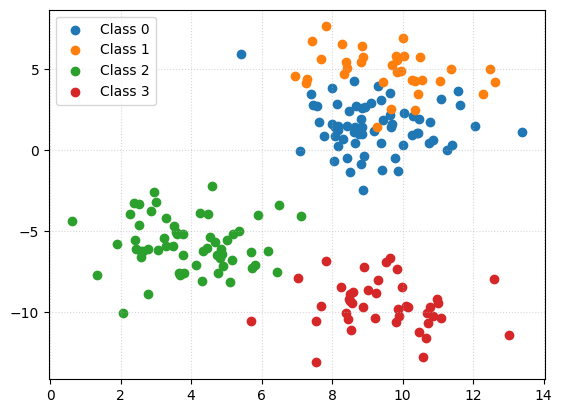

In [28]:
import matplotlib.pyplot as plt

knn = MyKNN(k=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

for label in np.unique(y_test):
    plt.scatter(X_test[y_pred==label, 0], X_test[y_pred==label, 1], label=f'Class {label}', alpha=1.0)
plt.legend()
plt.grid(True, linestyle='dotted', alpha=0.5)
plt.show()

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


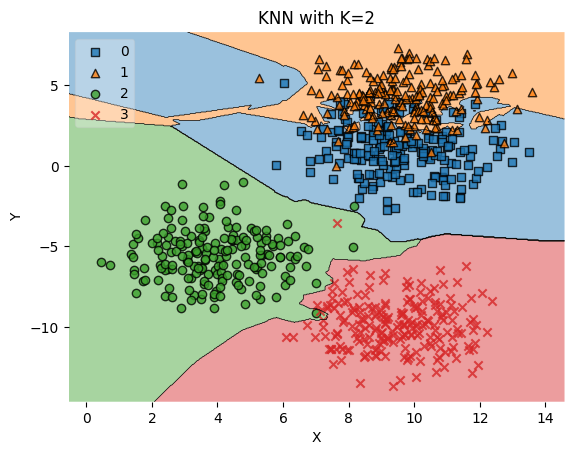

In [29]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, clf=knn, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'KNN with K=2')
plt.show()